<a href="https://colab.research.google.com/github/LJ1201/MSDS-490-Bank_Campaign/blob/main/MSDS_498_BankMkt_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import colors

Categorical variables

In [6]:
dt = data.dtypes
objList = []

for i in dt.index:
  if dt[i] in ["object"]:objList.append(i)

print(objList)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [7]:
data1 = data.copy()

Job

In [8]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

job
0 = unknown
1 = unemployed
2 = employed

In [9]:
unemployed = ['retired', ' unemployed','student']
unknown = ['unknown']

for i in range(0,len(data)):
  if data1['job'][i] in unemployed:
    data1['job'][i] = 1
  elif data1['job'][i] in unknown:
    data1['job'][i] = 0
  else:
    data1['job'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
data1['job'].value_counts()

2    38263
1     2595
0      330
Name: job, dtype: int64

marital status

In [12]:
data1['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [13]:
for i in range(0,len(data)):
  if data1['marital'][i] == "married":
    data1['marital'][i] = 3
  elif data1['marital'][i] == "single":
    data1['marital'][i] = 2
  elif data1['marital'][i] == "divorced":
    data1['marital'][i] = 1   
  else:
    data1['marital'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [14]:
'''
3 = married
2 = single
1 = divorced
0 = unknown
'''

data1['marital'].value_counts()

3    24928
2    11568
1     4612
0       80
Name: marital, dtype: int64

education variable

In [15]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

pre high school = [illiterate, basic.9y, basic.4y, basic.6y]

high school = [high school]

post high school = 'professional.course','university.degree']


In [16]:
pre_high = ['basic.9y','basic.4y','basic.6y','illiterate']

post_high = ['professional.course','university.degree']


for i in range(0,len(data1)):
  if data1['education'][i] in pre_high:
    data1['education'][i] = 1
  elif data1['education'][i] in post_high:
    data1['education'][i] = 3
  elif data1['education'][i] == 'unknown':
    data1['education'][i] =0
  else:
    data1['education'][i] = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [17]:
data1['education'].value_counts()

3    17411
1    12531
2     9515
0     1731
Name: education, dtype: int64

In [18]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [19]:
'''
default:
1 = yes
0 = no
0.5 = unknown
'''


for i in range(0,len(data1)):
  if data1['default'][i] =="yes":
    data1['default'][i] = 1
  elif data1['default'][i] in "no":
    data1['default'][i] = 0
  else:
    data1['default'][i] =0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_pa

In [20]:
data1['default'].value_counts()

0.0    32588
0.5     8597
1.0        3
Name: default, dtype: int64

In [21]:
data1['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [22]:
'''
housing:
1 = yes
0 = no
0.5 = unknown
'''


for i in range(0,len(data1)):
  if data1['housing'][i] =="yes":
    data1['housing'][i] = 1
  elif data1['housing'][i] in "no":
    data1['housing'][i] = 0
  else:
    data1['housing'][i] =0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as

In [23]:
data1['housing'].value_counts()

1.0    21576
0.0    18622
0.5      990
Name: housing, dtype: int64

In [24]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [25]:
'''
loan:
1 = yes
0 = no
0.5 = unknown
'''


for i in range(0,len(data1)):
  if data1['loan'][i] =="yes":
    data1['loan'][i] = 1
  elif data1['loan'][i] in "no":
    data1['loan'][i] = 0
  else:
    data1['loan'][i] =0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as

In [26]:
data1['loan'].value_counts()

0.0    33950
1.0     6248
0.5      990
Name: loan, dtype: int64

In [27]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [28]:
'''
contact:
1 = cellular
0 = telephone
'''


for i in range(0,len(data1)):
  if data1['contact'][i] =="cellular":
    data1['contact'][i] = 1
  elif data1['contact'][i] in "telephone":
    data1['contact'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [29]:
data1['contact'].value_counts()

1    26144
0    15044
Name: contact, dtype: int64

In [30]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [31]:
for i in range(0,len(data1)):
  if data1['month'][i] =="dec":
    data1['month'][i] = 12
  elif data1['month'][i] in "nov":
    data1['month'][i] = 11
  elif data1['month'][i] in "oct":
    data1['month'][i] = 10
  elif data1['month'][i] in "sep":
    data1['month'][i] = 9
  elif data1['month'][i] in "aug":
    data1['month'][i] = 8
  elif data1['month'][i] in "jul":
    data1['month'][i] = 7
  elif data1['month'][i] in "jun":
    data1['month'][i] = 6
  elif data1['month'][i] in "may":
    data1['month'][i] = 5
  elif data1['month'][i] in "apr":
    data1['month'][i] = 4
  elif data1['month'][i] in "mar":
    data1['month'][i] = 3
  elif data1['month'][i] in "feb":
    data1['month'][i] = 2
  elif data1['month'][i] in "jan":
    data1['month'][i] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [32]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [33]:
for i in range(0,len(data1)):
  if data1['day_of_week'][i] =="fri":
    data1['day_of_week'][i] = 5
  elif data1['day_of_week'][i] in "thu":
    data1['day_of_week'][i] = 4
  elif data1['day_of_week'][i] in "wed":
    data1['day_of_week'][i] = 3
  elif data1['day_of_week'][i] in "tue":
    data1['day_of_week'][i] = 2
  elif data1['day_of_week'][i] in "mon":
    data1['day_of_week'][i] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [34]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [35]:
'''
poutcome:
1 = success         
0 = failure
0.5 = nonexistent    
'''


for i in range(0,len(data1)):
  if data1['poutcome'][i] =="success":
    data1['poutcome'][i] = 1
  elif data1['poutcome'][i] == "failure":
    data1['poutcome'][i] = 0
  else:
    data1['poutcome'][i] =0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_pa

In [36]:
data1['poutcome'].value_counts()

0.5    35563
0.0     4252
1.0     1373
Name: poutcome, dtype: int64

In [37]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [38]:
for i in range(0,len(data1)):
  if data1['y'][i] =="yes":
    data1['y'][i] = 1
  elif data1['y'][i] == "no":
    data1['y'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Distribution Exploration**



In [39]:
def create_hist(data, title):
    fig, axs = plt.subplots(1, 1,figsize =(10, 7), tight_layout = True)
    axs.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    axs = sns.distplot(data, hist=True).set(title=title + ' Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


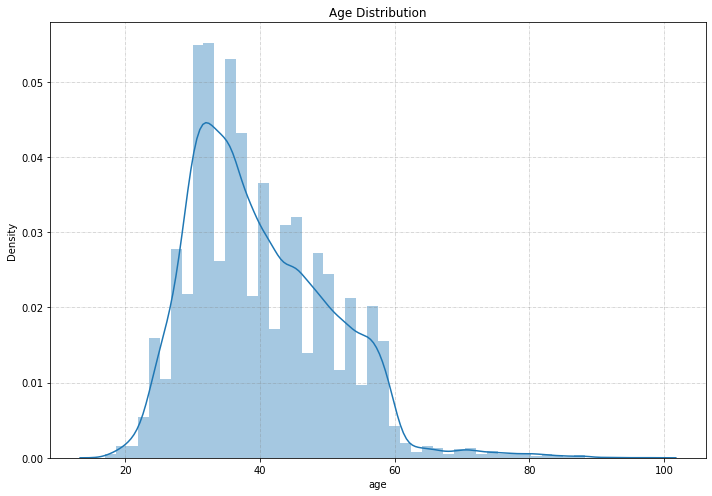

In [40]:
create_hist(data['age'], 'Age')

In [41]:
df_y = data[data['y'] == 'yes']
df_n = data[data['y'] =='no']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


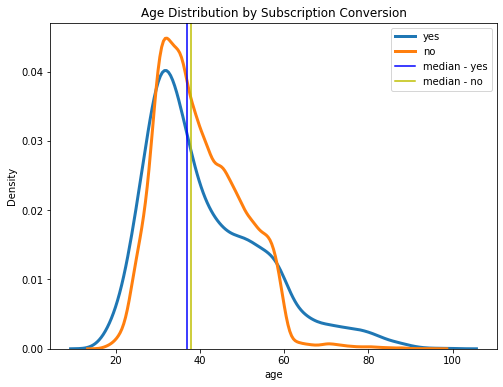

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['age'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['age'].median()
median_n = df_n['age'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.title('Age Distribution by Subscription Conversion')

plt.legend()

In [43]:
print(median_y, median_n)

37.0 38.0


some insights: the distribution of customer who subscribed or did not susbcribed the term deposit are pretty similar, interetingly the median age of subscriber is even younger than who did not by 1 year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


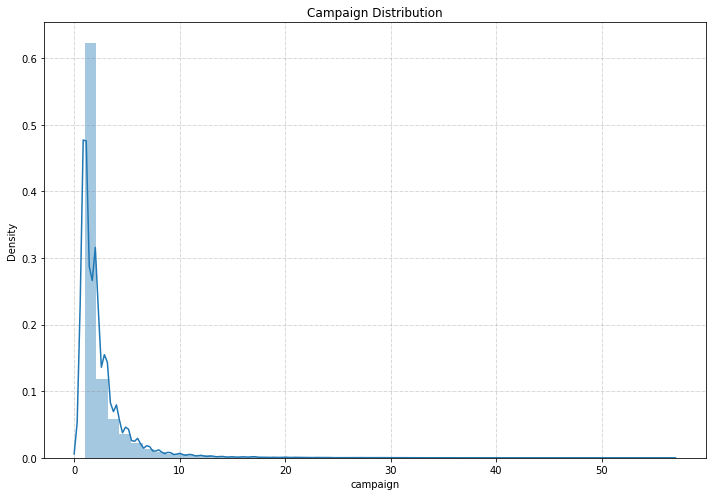

In [44]:
create_hist(data['campaign'], 'Campaign')

**Corrleation**

In [45]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


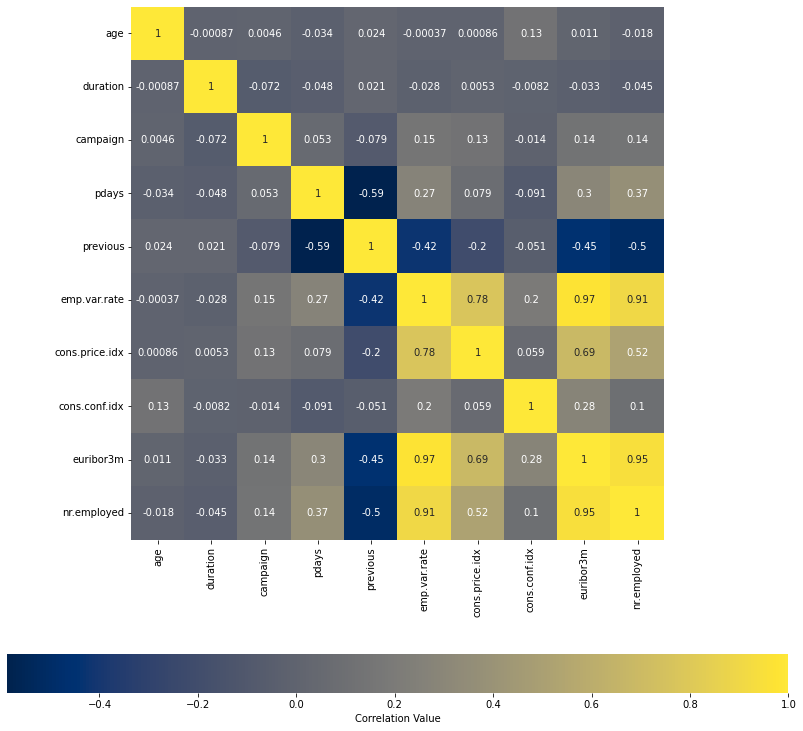

In [46]:
cor_df = data.corr()
plt.subplots(figsize = (14, 14))
sns.heatmap(cor_df,cmap = "cividis",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

Yes

**Conversion by different attribute**

In [47]:
data['binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [48]:
def conversion_bar(groupcol):
    df = pd.DataFrame(data.groupby(groupcol).apply(lambda x: x['binary'].sum()/len(x)).reset_index()).rename(columns={0:'conversion_rate'})
    fig, axs = plt.subplots(1, 1,figsize =(12, 5), tight_layout = True)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x=groupcol, y='conversion_rate', data=df)
    ax.title.set_text('conversion rate by {}'.format(groupcol))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


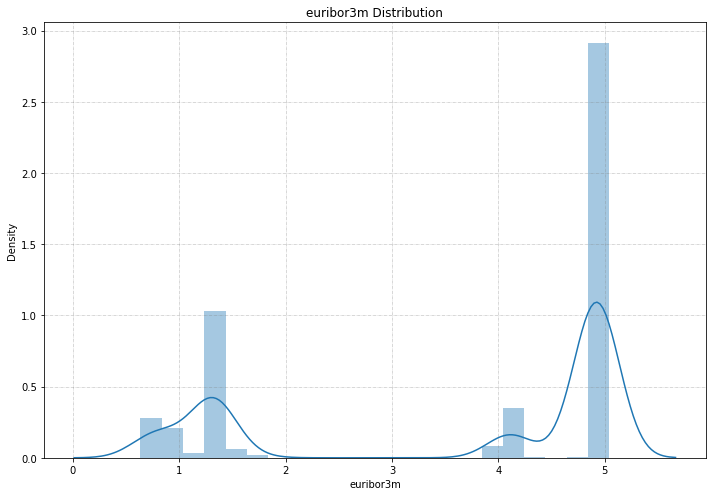

In [49]:
create_hist(data['euribor3m'], 'euribor3m')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


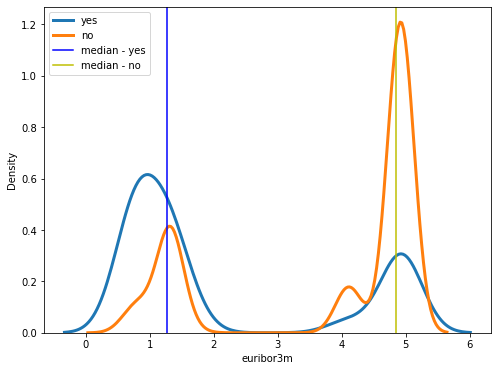

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(df_y['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'yes')
sns.distplot(df_n['euribor3m'], hist = False, kde = True, kde_kws = {'linewidth': 3},label = 'no')    

median_y = df_y['euribor3m'].median()
median_n = df_n['euribor3m'].median()

plt.axvline(x = median_y, color = 'b', label = 'median - yes')
plt.axvline(x = median_n, color = 'y', label = 'median - no')

plt.legend()

In [51]:
data['weekly'] = pd.cut(data["pdays"], np.arange(0, 90, 7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


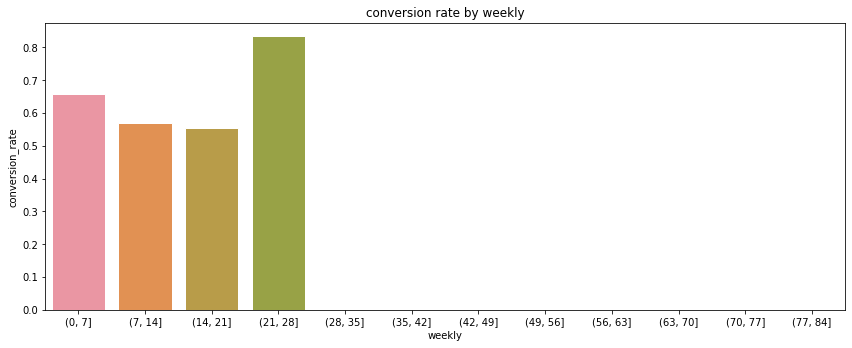

In [52]:
conversion_bar('weekly')

-people don't subscriber after 1 month following thg last contact
- conversion rate is higher when date get closer to 30 days

- holiday, people saves a lum sum of money,
- summer, people go vocation
- september, students start school
- there is no Jan, Feb data points

**PCA Analysis**

In [53]:
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_col = list(set(cols) - set(num_cols))
cat_col

['poutcome',
 'contact',
 'housing',
 'default',
 'job',
 'education',
 'day_of_week',
 'weekly',
 'loan',
 'marital',
 'month',
 'y']

In [54]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,3,1,0,0,0,0,5,1,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,3,2,0.5,0,0,0,5,1,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,3,2,0,1,0,0,5,1,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,3,1,0,0,0,0,5,1,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,3,2,0,0,1,0,5,1,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0


In [55]:
df_pca = data1.copy()

In [56]:
df_pca.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [57]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [58]:
df_pca['marital'].value_counts()

3    24928
2    11568
1     4612
0       80
Name: marital, dtype: int64

In [59]:
for i in objList:
  df_pca = df_pca.astype({i:'float'})

In [60]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  float64
 3   education       41188 non-null  float64
 4   default         41188 non-null  float64
 5   housing         41188 non-null  float64
 6   loan            41188 non-null  float64
 7   contact         41188 non-null  float64
 8   month           41188 non-null  float64
 9   day_of_week     41188 non-null  float64
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  float64
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [61]:
df_pca.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [62]:
df_pca.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2.0,3.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,2.0,3.0,2.0,0.5,0.0,0.0,0.0,5.0,1.0,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,2.0,3.0,2.0,0.0,1.0,0.0,0.0,5.0,1.0,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,2.0,3.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,2.0,3.0,2.0,0.0,0.0,1.0,0.0,5.0,1.0,...,1,999,0,0.5,1.1,93.994,-36.4,4.857,5191.0,0.0


In [63]:
df_pca.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [64]:
# Standardizing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

print(scaler.fit(df_pca))

df_pca = scaler.transform(df_pca)

df_pca = pd.DataFrame(df_pca)

df_pca.head()



MinMaxScaler()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.481481,1.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,1.0,1.0,0.666667,0.5,0.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,1.0,1.0,0.666667,0.0,1.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,1.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,1.0,1.0,0.666667,0.0,0.0,1.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [65]:
df_pca.columns = data1.columns

In [66]:
df_pca.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,1.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,1.0,1.0,0.666667,0.5,0.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,1.0,1.0,0.666667,0.0,1.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,1.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,1.0,1.0,0.666667,0.0,0.0,1.0,0.0,0.222222,0.0,...,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [67]:
pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6db58130a0a0655ef9d7bc4d78b6565183910447c015a19dc5a207d0a494c944
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [68]:
x= df_pca.drop('y',1)
y = df_pca['y']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [69]:
# PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

pca = PCA(0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [70]:
explained_variance 

array([0.2892132 , 0.15900526, 0.11911567, 0.08553476, 0.08189594,
       0.06745623, 0.0400695 , 0.03503132, 0.03049648])

In [71]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [72]:
from operator import itemgetter

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

feature_cols = list( x.columns.values )
vars_RF_flag = getEnsembleTreeVars( classifier, feature_cols )


In [73]:
vars_RF_flag

[('loan', 100), ('age', 61), ('month', 33)]

In [74]:
y_pred = classifier.predict(X_test)

[[ 142  777]
 [  58 7261]]
Accuracy = 0.8986404467103666


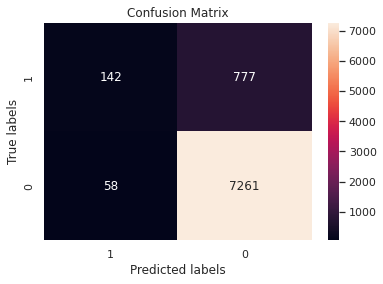

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt   

cm = confusion_matrix(y_test, y_pred,labels=[1,0])


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);


print(cm)
print('Accuracy = {}'.format(accuracy_score(y_test, y_pred)))

In [76]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 0.1013595532896334


In [77]:
from sklearn.ensemble import GradientBoostingClassifier



lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))


Learning rate:  0.05
Accuracy score (training): 0.899
Accuracy score (test): 0.899
Learning rate:  0.075
Accuracy score (training): 0.899
Accuracy score (test): 0.899
Learning rate:  0.1
Accuracy score (training): 0.899
Accuracy score (test): 0.898
Learning rate:  0.25
Accuracy score (training): 0.902
Accuracy score (test): 0.898
Learning rate:  0.5
Accuracy score (training): 0.905
Accuracy score (test): 0.900
Learning rate:  0.75
Accuracy score (training): 0.908
Accuracy score (test): 0.895
Learning rate:  1
Accuracy score (training): 0.908
Accuracy score (test): 0.893


learning rate = 0.5 gives the best performance on the test sets

In [78]:
from sklearn.metrics import classification_report

gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[7218  101]
 [ 727  192]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      7319
         1.0       0.66      0.21      0.32       919

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238

